In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [20]:
model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded successfully')

model loaded successfully


In [21]:
path = './test_images/n9.jpg'
image = load_img(path) 
image = np.array(image,dtype=np.uint8) 
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 

In [22]:

h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 2141
Width of the image = 2130


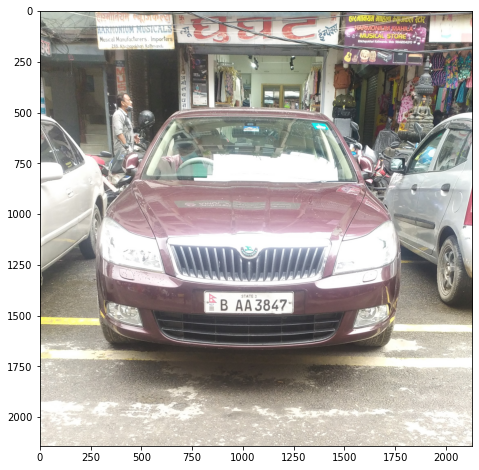

In [23]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [24]:
image_arr_224.shape

(224, 224, 3)

In [25]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [26]:

coords = model.predict(test_arr)
coords

array([[0.38431954, 0.6305568 , 0.61375093, 0.6901418 ]], dtype=float32)

In [27]:

denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[ 818.60062838, 1343.08603048, 1314.04075098, 1477.59358752]])

In [28]:
coords = coords.astype(np.int32)
coords

array([[ 818, 1343, 1314, 1477]])

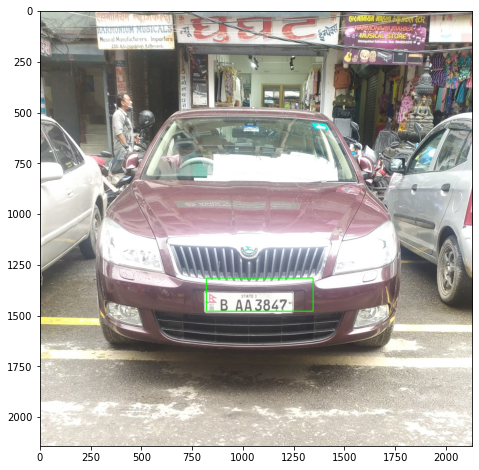

In [29]:

xmin,xmax,ymin,ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
pt1,pt2
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [30]:

path = './test_images/n9.jpg'
def object_detection(path):
    
    image = load_img(path)
    image = np.array(image,dtype=np.uint8) 
    image1 = load_img(path,target_size=(224,224))
    
    image_arr_224 = img_to_array(image1)/255.0 
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)

    
    coords = model.predict(test_arr)
   
    
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
   
    coords = coords.astype(np.int32)
   
    xmin,xmax,ymin,ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    pt1,pt2
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

 

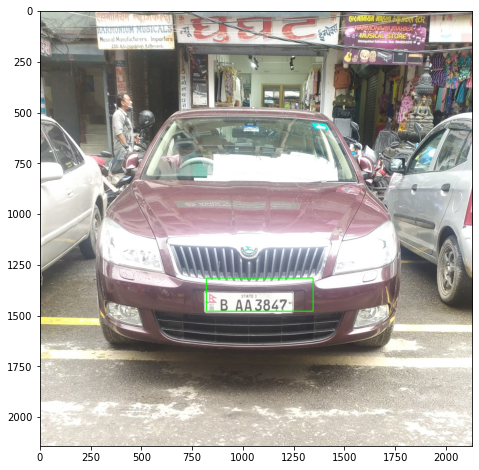

In [31]:
path = './test_images/n9.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [32]:

import pytesseract as pt

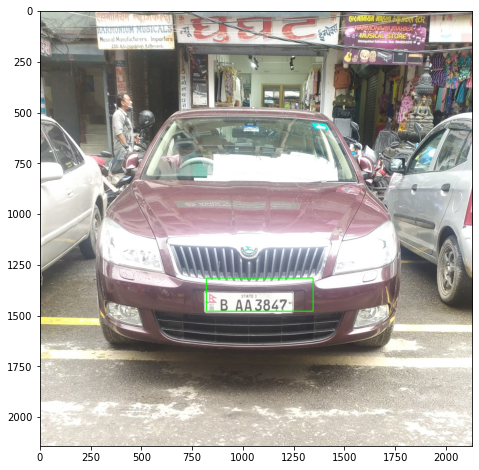

In [33]:
path = './test_images/n9.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [34]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]




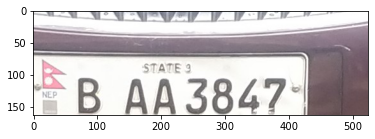

In [35]:
plt.imshow(roi)
plt.show()

In [36]:
text = pt.image_to_string(roi)
print(text)

"" ‘ \l"VL:1l‘,'\'.YV_JI II II“)! II

    

E B /£7f3347~.


